- In this notebook, I will try to demonstrate how to build different type of transformer.I will be creating different flavours of BERT to GPT. Majority of the concepts and code block for the below kernel are derived from the below notebook:
[nlp-end-to-end by colearninglounge](https://www.kaggle.com/colearninglounge/nlp-end-to-end-cll-nlp-workshop-2#DistilBERT-Model)

The following is the workflow of this notebook:
1. Import the library
2. Load the dataset
3. Clean the datset
4. Configure the TPU
5. Fast-encoding
6. Different types of transformer model

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install BeautifulSoup4
!pip install pydot

In [ ]:
import os
from bs4 import BeautifulSoup
from collections import Counter,defaultdict
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import re
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,StratifiedKFold,KFold,StratifiedShuffleSplit,cross_val_predict
from lightgbm import LGBMClassifier as lg
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import LSTM, Dense,Flatten,Conv2D,Conv1D,GlobalMaxPooling1D,GlobalMaxPool1D
from keras.optimizers import Adam
import numpy as np  
import pandas as pd 
import keras.backend as k
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional,GRU
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from kaggle_datasets import KaggleDatasets
import transformers
from tqdm.notebook import tqdm
from tokenizers import BertWordPieceTokenizer
from sklearn.model_selection import train_test_split
import numpy as np
from transformers import AutoTokenizer, pipeline, TFDistilBertModel,TFAutoModel
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
import string
from unidecode import unidecode
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [ ]:
train_df= pd.read_json("/kaggle/input/github-bugs-prediction/embold_train.json").reset_index(drop=True)
test_df= pd.read_json("/kaggle/input/github-bugs-prediction/embold_test.json").reset_index(drop=True)
train_extra_df= pd.read_json("../input/github-bugs-prediction/embold_train_extra.json").reset_index(drop=True)

In [ ]:
def fx(x):
    return x['title'] + " " + x['body']   
train_df['text']= train_df.apply(lambda x : fx(x),axis=1)
test_df['text']= test_df.apply(lambda x : fx(x),axis=1)

In [ ]:
cList = {
            "i'm": "i am",
            "you're": "you are",
            "it's": "it is",
            "we're": "we are",
            "we'll": "we will",
            "That's":"that is",
            "haven't":"have not",
            "let's":"let us",
            "ain't": "am not / are not / is not / has not / have not",
            "aren't": "are not / am not",
            "can't": "cannot",
            "can't've": "cannot have",
            "'cause": "because",
            "could've": "could have",
            "couldn't": "could not",
            "couldn't've": "could not have",
            "didn't": "did not",
            "doesn't": "does not",
            "don't": "do not",
            "hadn't": "had not",
            "hadn't've": "had not have",
            "hasn't": "has not",
            "haven't": "have not",
            "he'd": "he had / he would",
            "he'd've": "he would have",
            "he'll": "he shall / he will",
            "he'll've": "he shall have / he will have",
            "he's": "he has / he is",
            "how'd": "how did",
            "how'd'y": "how do you",
            "how'll": "how will",
            "how's": "how has / how is / how does",
            "I'd": "I had / I would",
            "I'd've": "I would have",
            "I'll": "I shall / I will",
            "I'll've": "I shall have / I will have",
            "I'm": "I am",
            "I've": "I have",
            "isn't": "is not",
            "it'd": "it had / it would",
            "it'd've": "it would have",
            "it'll": "it shall / it will",
            "it'll've": "it shall have / it will have",
            "it's": "it has / it is",
            "let's": "let us",
            "ma'am": "madam",
            "mayn't": "may not",
            "might've": "might have",
            "mightn't": "might not",
            "mightn't've": "might not have",
            "must've": "must have",
            "mustn't": "must not",
            "mustn't've": "must not have",
            "needn't": "need not",
            "needn't've": "need not have",
            "o'clock": "of the clock",
            "oughtn't": "ought not",
            "oughtn't've": "ought not have",
            "shan't": "shall not",
            "sha'n't": "shall not",
            "shan't've": "shall not have",
            "she'd": "she had / she would",
            "she'd've": "she would have",
            "she'll": "she shall / she will",
            "she'll've": "she shall have / she will have",
            "she's": "she has / she is",
            "should've": "should have",
            "shouldn't": "should not",
            "shouldn't've": "should not have",
            "so've": "so have",
            "so's": "so as / so is",
            "that'd": "that would / that had",
            "that'd've": "that would have",
            "that's": "that has / that is",
            "there'd": "there had / there would",
            "there'd've": "there would have",
            "there's": "there has / there is",
            "they'd": "they had / they would",
            "they'd've": "they would have",
            "they'll": "they shall / they will",
            "they'll've": "they shall have / they will have",
            "they're": "they are",
            "they've": "they have",
            "to've": "to have",
            "wasn't": "was not",
            "we'd": "we had / we would",
            "we'd've": "we would have",
            "we'll": "we will",
            "we'll've": "we will have",
            "we're": "we are",
            "we've": "we have",
            "weren't": "were not",
            "what'll": "what shall / what will",
            "what'll've": "what shall have / what will have",
            "what're": "what are",
            "what's": "what has / what is",
            "what've": "what have",
            "when's": "when has / when is",
            "when've": "when have",
            "where'd": "where did",
            "where's": "where has / where is",
            "where've": "where have",
            "who'll": "who shall / who will",
            "who'll've": "who shall have / who will have",
            "who's": "who has / who is",
            "who've": "who have",
            "why's": "why has / why is",
            "why've": "why have",
            "will've": "will have",
            "won't": "will not",
            "won't've": "will not have",
            "would've": "would have",
            "wouldn't": "would not",
            "wouldn't've": "would not have",
            "y'all": "you all",
            "y'all'd": "you all would",
            "y'all'd've": "you all would have",
            "y'all're": "you all are",
            "y'all've": "you all have",
            "you'd": "you had / you would",
            "you'd've": "you would have",
            "you'll": "you shall / you will",
            "you'll've": "you shall have / you will have",
            "you're": "you are",
            "you've": "you have"
           }

In [ ]:
c_re = re.compile('(%s)' % '|'.join(cList.keys()))
def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text)

In [ ]:
def remove_emoji(string):
        emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', string)

In [ ]:
def remove_punctuations(data):
    punct_tag=re.compile(r'[^\w\s]')
    data=punct_tag.sub(r'',data)
    return data

In [ ]:
def removeSpecialChars(data):
    '''
    Removes special characters which are specifically found in tweets.
    '''
    #Converts HTML tags to the characters they represent
    soup = BeautifulSoup(data, "html.parser")
    data = soup.get_text()

    #Convert www.* or https?://* to empty strings
    data = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',data)

    #Convert @username to empty strings
    data = re.sub('@[^\s]+','',data)
    
    #remove org.apache. like texts
    data =  re.sub('(\w+\.){2,}','',data)

    #Remove additional white spaces
    data = re.sub('[\s]+', ' ', data)
    
    data = re.sub('\.(?!$)', '', data)

    #Replace #word with word
    data = re.sub(r'#([^\s]+)', r'\1', data)

    return data 

In [ ]:
def remove_nonenglish_charac(string):
    return re.sub('\W+','', string )

In [ ]:
extra_punctuations = ['','.', '``', '...', '\'s', '--', '-', 'n\'t', '_', '–','&']
stopword_list = stopwords.words('english') + list(string.punctuation)+ extra_punctuations + ['u','the','us','say','that','he','me','she','get','rt','it','mt','via','not','and','let','so','say','dont','use','you']

In [ ]:
def clean_text(data):
    wordnet_lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer() 
    tokenizer=TweetTokenizer()
    data = unidecode(data)
    data = expandContractions(data)
    tokens = tokenizer.tokenize(data)
    data = ' '.join([tok for tok in tokens if len(tok) > 2 if tok not in stopword_list and not tok.isdigit()])
    data = re.sub('\b\w{,2}\b', '', data)
    data = re.sub(' +', ' ', data)
    data = removeSpecialChars(data)
    data = remove_emoji(data)
    data= [stemmer.stem(w) for w in data.split()]
    return ' '.join([wordnet_lemmatizer.lemmatize(word) for word in data])

In [ ]:
train_df['text'] = train_df['text'].apply(lambda x: clean_text(x))

In [ ]:
train_y=train_df['label']
train_x,val_x,train_y,val_y=train_test_split(train_df['text'],train_y,test_size=0.2,random_state=50)

In [ ]:
try:    
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    print('TPU is not initialized ')
    tpu = None

In [ ]:
if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy()
print("Replicas num: ", strategy.num_replicas_in_sync)
AUTO = tf.data.experimental.AUTOTUNE
# Configuration of hyperparameters
EPOCHS = 2
#batch size denotes the partitioning amongst the cluster replicas.
BATCH_SIZE = 16 * strategy.num_replicas_in_sync
MAX_LEN = 192

In [ ]:
#Tokenize the data and separate them in chunks of 256 units

maxlen=512
chunk_size=256
def quick_encode(texts,tokenizer, maxlen=maxlen):
    enc_di = tokenizer.batch_encode_plus(
        texts,
        return_attention_mask=False,
        return_token_type_ids=False,
        pad_to_max_length=True,
        max_length=maxlen,
        truncation=True,
    )
    return np.array(enc_di["input_ids"])

In [ ]:
def built_model(transformer,train_x_enc,val_x_enc,train_y,val_y,batch_size,img_name, max_len=512):
    inp_words_ids = Input(shape =(max_len,),dtype = tf.int32,name="input_word_ids")
    seq_output = transformer(inp_words_ids)[0]
    cls_token = seq_output[:,0,:]
    output =  Dense(3,activation='softmax')(cls_token)
    model = Model(inputs =inp_words_ids,outputs=output)
    model.compile(Adam(lr=1e-5),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    model.summary()
    plot_model(
        model,to_file=img_name,
        show_shapes=True,
        show_layer_names=True,
        rankdir="TB",
        expand_nested=False,
        dpi=96)
    model.fit(
        train_x_enc,
        train_y,
        steps_per_epoch=batch_size,
        validation_data=(val_x_enc,val_y),
        epochs=EPOCHS
        )

In [ ]:
def del_obects(*args):
    for arg in args:
        del arg
        gc.collect()

# Bert
BERT is bidirectional encoder Transformer model
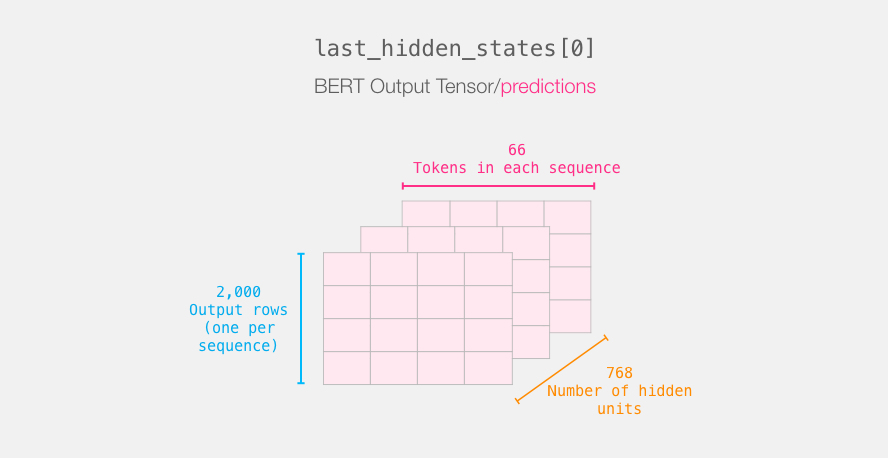

Slicing the important part For sentence classification, we’re only only interested in BERT’s output for the [CLS] token, so we select that slice of the cube and discard everything else.

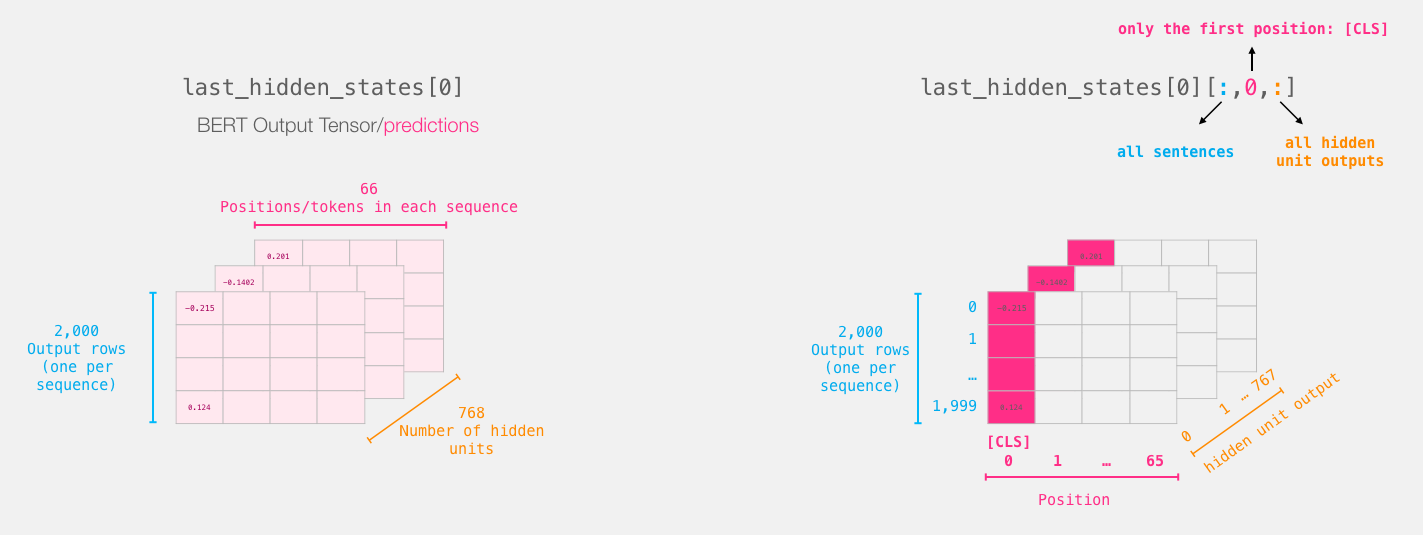

The entire workflow can be designed as follows:

This image can be used to describe the workflow:

# Distilbert Transformer:
- This is a distilled version of pretraining BERT to produce a lightweight version of it. It is analogous to teacher supervision of a neural network learning to optimize tis weights. DistilBERT Paper provides an insight why it is 40% smaller but preserves 95% of BERT's weights for transfer learning.
- DistilBERT is a small, fast, cheap and light Transformer model trained by distilling BERT base. It has 40% less parameters than bert-base-uncased, runs 60% faster while preserving over 95% of BERT’s performances as measured on the GLUE language understanding benchmark. 2 significant benchmarks aspects of this Model:

- Quantization :This leads to approximation of internal weight vectors to a numerically smaller precision
- Weights Pruning: Removing some connections from the network.
- Knowledge distillation (sometimes also referred to as teacher-student learning) is a compression technique in which a small model is trained to reproduce the behavior of a larger model (or an ensemble of models). It was introduced by Bucila et al. and generalized by Hinton et al. a few years later. We will follow the latter method.Rather than training with a cross-entropy over the hard targets (one-hot encoding of the gold class), we transfer the knowledge from the teacher to the student with a cross-entropy over the soft targets (probabilities of the teacher). Our training loss thus becomes:


In [ ]:
distilbert_tokenizer = transformers.DistilBertTokenizer.from_pretrained('distilbert-base-multilingual-cased')
train_x_enc= quick_encode(train_x.astype(str),distilbert_tokenizer, maxlen=MAX_LEN)
val_x_enc = quick_encode(val_x.astype(str),distilbert_tokenizer,maxlen=MAX_LEN)

with strategy.scope():
    transformer_layer = TFAutoModel.from_pretrained('distilbert-base-multilingual-cased')
    built_model(transformer_layer,train_x_enc,val_x_enc,train_y,val_y,train_x_enc.shape[0],
                "Distilbert_Multilingual_Transformer.png",max_len=MAX_LEN)
    
    del_obects(train_x_enc,val_x_enc,distilbert_tokenizer,transformer_layer)
    

# Albert Transformer
- Albert is a lightweight bert which introduces parameter sharing, caching, and intermediate repeated splitting of the embedding matrix for efficient modelling tasks.

- According to the paper:

- 'The first one is a factorized embedding parameterization. By decomposing the large vocabulary embedding matrix into two small matrices, we separate the size of the hidden layers from the size of vocabulary embedding. This separation makes it easier to grow the hidden size without significantly increasing the parameter size of the vocabulary embeddings. The second technique is cross-layer parameter sharing. This technique prevents the parameter from growing with the depth of the network. Both techniques significantly reduce the number of parameters for BERT without seriously hurting performance, thus improving parameter-efficiency. An ALBERT configuration similar to BERT-large has 18x fewer parameters and can be trained about 1.7x faster. The parameter reduction techniques also act as a form of regularization that stabilizes the training and helps with generalization. To further improve the performance of ALBERT, we also introduce a self-supervised loss for sentence-order prediction (SOP). SOP primary focuses on inter-sentence coherence and is designed to address the ineffectiveness (Yang et al., 2019; Liu et al., 2019) of the next sentence prediction (NSP) loss proposed in the original BERT.'

In [ ]:
albert_tokenizer = transformers.AlbertTokenizer.from_pretrained('albert-base-v1')
train_x_enc= quick_encode(train_x.astype(str),albert_tokenizer, maxlen=MAX_LEN)
val_x_enc = quick_encode(val_x.astype(str),albert_tokenizer,maxlen=MAX_LEN)

with strategy.scope():
    transformer_layer = TFAutoModel.from_pretrained('albert-base-v1')
    built_model(transformer_layer,train_x_enc,val_x_enc,train_y,val_y,train_x_enc.shape[0],
                "AlbertTransformer.png",max_len=MAX_LEN)
    
    del_obects(train_x_enc,val_x_enc,albert_tokenizer,transformer_layer)

# XLM Roberta/Roberta:
- XLM builds on BERT and modifies key hyperparameters, removing the next-sentence pretraining objective and training with much larger mini-batches and learning rates.

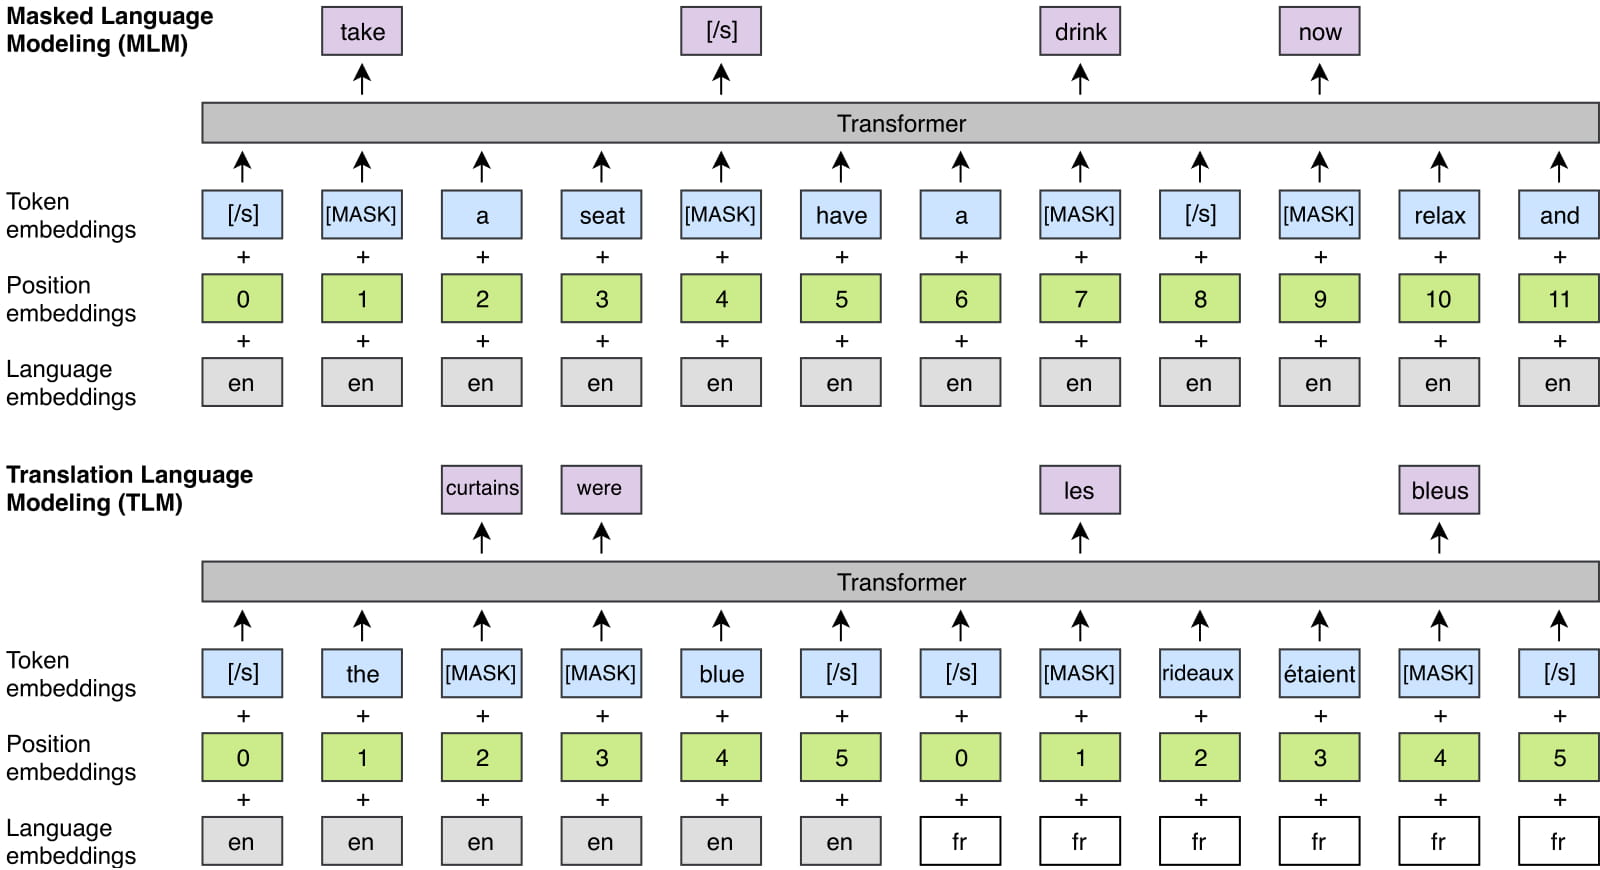
Tips:

This implementation is the same as BertModel with a tiny embeddings tweak as well as a setup for Roberta pretrained models.

RoBERTa has the same architecture as BERT, but uses a byte-level BPE as a tokenizer (same as GPT-2) and uses a different pretraining scheme.

RoBERTa doesn’t have token_type_ids, you don’t need to indicate which token belongs to which segment. Just separate your segments with the separation token tokenizer.sep_token (or </s>)

CamemBERT is a wrapper around RoBERTa.

In [ ]:
xlm_roberta_tokenizer = transformers.XLMRobertaTokenizer.from_pretrained('xlm-roberta-base')
train_x_enc= quick_encode(train_x.astype(str),xlm_roberta_tokenizer, maxlen=MAX_LEN)
val_x_enc = quick_encode(val_x.astype(str),xlm_roberta_tokenizer,maxlen=MAX_LEN)

with strategy.scope():
    transformer_layer = TFAutoModel.from_pretrained('xlm-roberta-base')
    built_model(transformer_layer,train_x_enc,val_x_enc,train_y,val_y,train_x_enc.shape[0],
                "Roberta-Transformer.png",max_len=MAX_LEN)
    
    del_obects(train_x_enc,val_x_enc,xlm_roberta_tokenizer,transformer_layer)

# GPT-Generative Pretraining

- It large transformer-based language model with 1.5 billion parameters, trained on a dataset[1] of 8 million web pages. GPT-2 is trained with a simple objective: predict the next word, given all of the previous words within some text. The diversity of the dataset causes this simple goal to contain naturally occurring demonstrations of many tasks across diverse domains. GPT-2 is a direct scale-up of GPT, with more than 10X the parameters and trained on more than 10X the amount of data.

Tips:

GPT-2 is a model with absolute position embeddings so it’s usually advised to pad the inputs on the right rather than the left.

GPT-2 was trained with a causal language modeling (CLM) objective and is therefore powerful at predicting the next token in a sequence. Leveraging this feature allows GPT-2 to generate syntactically coherent text as it can be observed in the run_generation.py example script.

The PyTorch models can take the past as input, which is the previously computed key/value attention pairs.

In [ ]:
gpt2_tokenizer = transformers.GPT2Tokenizer.from_pretrained('gpt2-medium')
train_x_enc= quick_encode(train_x.astype(str),gpt2_tokenizer, maxlen=MAX_LEN)
val_x_enc = quick_encode(val_x.astype(str),gpt2_tokenizer,maxlen=MAX_LEN)

with strategy.scope():
    
    transformer_layer = TFAutoModel.from_pretrained('gpt2-medium')
    built_model(transformer_layer,train_x_enc,val_x_enc,train_y,val_y,train_x_enc.shape[0],
                "GPT2-Transformer.png",max_len=MAX_LEN)
    
    del_obects(train_x_enc,val_x_enc,gpt2_tokenizer,transformer_layer)

# Conclusion of Notebook
This notebook concludes classification models created using all BERT-based transformer from Bert to Gpt. TThanks to Colearning lounge NLP workshop and my mentor @abhilash1910 